# Applied Statistics: Lab 2

## Question 1

**IMPLEMENTATION NOTE**: `rvs` **function**:<br>
The `rvs` (short for "random variate sampling") is a method from the `rv_continuous` class or any of its subclasses, contained in the module `scipy.stats`. It samples from a given distribution. A generic continuous random variable class meant for subclassing. `rv_continuous` is a base class to construct specific distribution classes and instances for continuous random variables. It cannot be used directly as a distribution. To use a specific distribution (ex. normal distribution), use the specific subclass of `rv_continuous` (ex. `norm` for normal distribution). For example, an instance of the `norm` class is an instance of the `rv_continuous` class; the `norm` object inherits from it a collection of generic methods (including `rvs`), and completes them with details specific for this particular distribution.

> REFERENCES:
> - `rv_continuous`:<br>https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html
> - `norm`:<br>https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [1]:
from scipy.integrate import quad
from scipy.stats import norm, uniform, cauchy, beta
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x1 = norm.rvs(loc=0, scale=1, size=30)
x2 = norm.rvs(loc=2, scale=4, size=30)
x3 = uniform.rvs(loc=0, scale=1, size=30)
x4 = [x3[i]*uniform.rvs(loc=0, scale=1, size=1)[0] for i in range(30)]

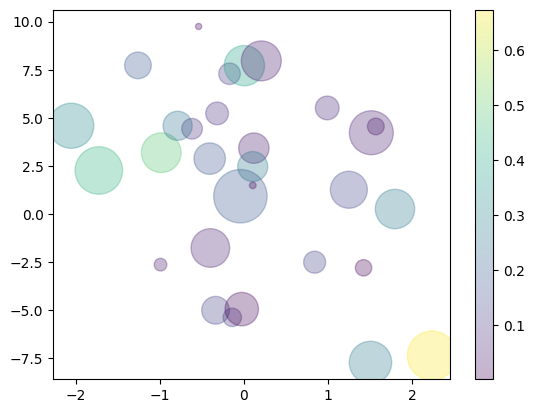

In [3]:
plt.scatter(x1, x2, s=x3*1500, c=x4, alpha=0.3)
plt.colorbar()
plt.show()

### Observations
We know that the variables `x3` and `x4` are not entirely independent of each other, given the fact that for each $x_3 \in$ `x3` and each $x_4$ in `x4`, $x_4=ux_3$, where $u$ is a uniform random variate. This is reflected in the graph by the fact that the higher the size of the bubbles (reflecting the value of $x_3$), the higher the color-scale value of $x_4$ tends to be (with some random variation, which is to be expected due to the nature of $u$).

## Question 2

`rvs_continuous.ppf` (PPF stands for point probability function) returns the inverse of the CDF (cumulative distribution function), i.e. for a given lower-tail/cumulative probability mass (i.e. the probability mass of all points at or lower some point), it returns the point at which the CDF would return the given lower-tail probability. As it is defined for the broader class of `rvs_continuous`, it is also defined for its subclasses `norm`, `cauchy`, etc. Below is a demonstration of the function...

In [4]:
# The lower-tail probability mass (LTPM)...
# ... of a normal distribution with mean=2, standard deviation=3
LTPM = norm.cdf(2, loc=3, scale=4)

# The PPF of the given LTPM (for the same distribution)...
norm.ppf(LTPM, loc=3, scale=4)

2.0

Starting from the 1st percentile upto the 99th perceptile, at the ith percentile, we shall take the PPF of both the normal and the Cauchy distribution for lower-tailed/cumulative probability mass $= \frac{i}{100}$. In essence, we are finding the value for which the lower-tail probability is $\frac{i}{100}$, hence the ith percentile, since the total probability of the distribution is $1$.<br><br>**NOTE**: We start with the 1st percentile and end with the 99th percentile (rather than the 0th and the 100th) because both normal & Cauchy distributions are asymptotic along the x-axis, i.e. the probability density of any point is never zero, but the probability density of a x-value as its magnitude approaches infinity approaches zero.

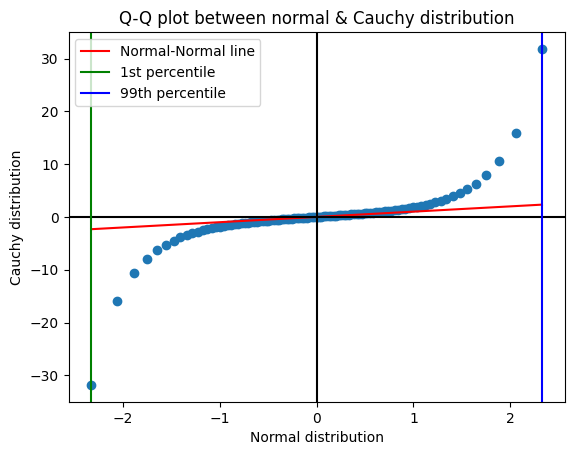

In [5]:
xPercentiles, yPercentiles = [], []
for i in range(1, 100):
  """
  NOTE ON THE ABOVE RANGE:
  We start with the 1st percentile & end with the 99th percentile. This is
  because both normal & Cauchy distributions are asymptotic along the x-axis,
  i.e. the probability density of any point is never zero, but the probability
  density of a x-value as its magnitude approaches infinite approaches zero.
  """

  # ith percentile of the normal distribution:
  xPercentiles.append(norm.ppf(i/100, loc=0, scale=1))
  # ith percentile of the Cauchy distribution:
  yPercentiles.append(cauchy.ppf(i/100, loc=0, scale=1))
  """
  NOTE ON THE ABOVE:
  We are finding the value for which the lower-tail probability is i/100, hence
  the ith percentile, since the total probability of the distribution is 1.
  """

plt.scatter(xPercentiles, yPercentiles)
plt.plot(xPercentiles, xPercentiles, color='r', label="Normal-Normal line")
# Drawing axes:
plt.axhline(color='k'), plt.axvline(color='k')
# Marking the 1st & 99th percentiles for reference:
percentile1 = norm.ppf(0.01, loc=0, scale=1)
percentile99 = norm.ppf(0.99, loc=0, scale=1)
plt.axvline(x=percentile1, color='g', label="1st percentile")
plt.axvline(x=percentile99, color='b', label="99th percentile")
# Titling, labeling & displaying the plot:
plt.title("Q-Q plot between normal & Cauchy distribution")
plt.xlabel("Normal distribution"), plt.ylabel("Cauchy distribution")
plt.legend()
plt.show()

### Conclusions
Since the normal distribution is symmetric about the mean, and since the above Q-Q plot is symmetric about the mean, we can see that the Cauchy distribution is also symmetric about the mean. This means that the left and right tails of each distribution (starting from the mean) are equal in area (i.e. area under the density distribution curve). The above Q-Q plot also shows that the quantiles are much lower or much higher than the median (50th percentile, which is $0$ in our case), the points on Cauchy distribution corresponding to the quantiles are much further from the mean (which is $0$ for both distributions in our case) compared to the normal distribution. This shows that the tails of the Cauchy distribution are fatter compared to those of the normal distribution.

## Question 3

The support of a _Beta_ distribution is $[0,1]$. The PDF of the sum of two _Beta_ distributions is given by<br>$f_{1+2}(t)=\int_{-\infty}^{\infty} f_1(x)f_2(t-x)dx$<br>Thus, the support for the sum of two _Beta_ distributions is the range of values for $t$ for which the above integral is non-zero, i.e. the range of values for $t$ for which the product $f_1(x)f_2(t-x)$ is non-zero for at least some $x$. Given that the support of each _Beta_ distribution is $[0,1]$. this means the support of the sum of two _Beta_ distributions is the range of values for $t$ for which $0 \leq x \leq 1$ and $0 \leq t-x \leq 1$. Hence, let us fix $0 \leq x \leq 1$ and consider...<br>$0 \leq t-x \leq 1$<br>$\implies x \leq t \leq 1+x$<br>$\implies min(x) \leq t \leq 1+max(x)$<br>$\implies 0 \leq t \leq 1+1$<br>For this, we get the minimum value of $t$ as $0$ and the maximum value of $t$ as $2$. Thus, the support of the sum of two _Beta_ distributions is $[0,2]$.

In [6]:
# Defining the integrand of the convolution:
convolution = lambda x, t, f1, f2: f1(x)*f2(t-x)

In [7]:
# Creating 100 values along the support of the sum of our distributions:
T = np.linspace(0, 2, 100)

# Creating distributions:
# NOTE: Using a dictionary for readability
dist = {}
dist["B1"], dist["B2"], dist["B1+B2"] = beta(2, 8), beta(8, 2), []

# Adding the density values of B1+B2 for 100 values from 0 to 2:
for t in T:
  # Obtaining probability density value for t:
  pdf_t = quad(convolution, 0, 1, args=(t, dist["B1"].pdf, dist["B2"].pdf))[0]
  # Adding above value to the respective list:
  dist["B1+B2"].append(pdf_t)

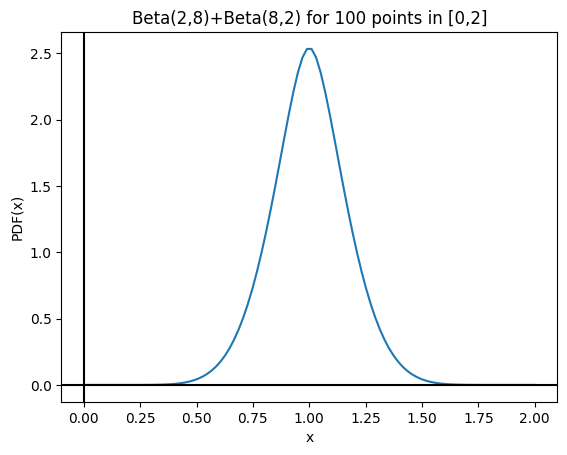

In [8]:
plt.plot(T, dist["B1+B2"])
# Drawing axes
plt.axhline(color='k'), plt.axvline(color='k')
# Titling, labeling & displaying the plot:
plt.title("Beta(2,8)+Beta(8,2) for 100 points in [0,2]")
plt.xlabel('x'), plt.ylabel("PDF(x)")
plt.show()

Generating and plotting samples...

In [9]:
# Creating samples:
# NOTE: Using a dictionary for readability
sample = {}
sample["B1"] = beta.rvs(a=2, b=8, size=10000)
sample["B2"] = beta.rvs(a=8, b=2, size=10000)
sample["B1+B2"] = sample["B1"] + sample["B2"]

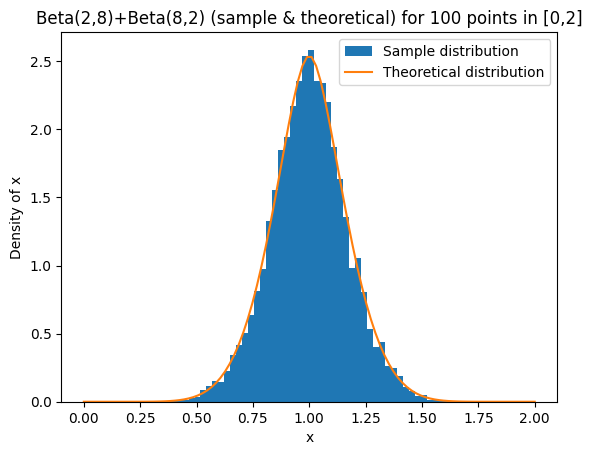

In [10]:
plt.hist(sample["B1+B2"], bins=50, density=True, label="Sample distribution")
"""
If `density=True`, the histogram function draws and returns a frequency
density (an approximate of the probability density): each bin will display the
bin's raw count divided by the total number of counts and the bin width, i.e.
```
density = counts / (sum(counts) * np.diff(bins)))
```
This is done so that the area under the histogram integrates to 1; hence, we
approximate the probability density function using the data.
"""
plt.plot(T, dist["B1+B2"], label="Theoretical distribution")
# Titling, labeling & displaying the plot:
plt.title("Beta(2,8)+Beta(8,2) (sample & theoretical) for 100 points in [0,2]")
plt.xlabel('x'), plt.ylabel("Density of x")
plt.legend()
plt.show()

### Observations
The frequency-based densities of the $10000$ sums of samples drawn from the $Beta(2,8)$ and $Beta(8,2)$ distributions match closely with the probability density curve of the $Beta(2,8)+Beta(8,2)$ distribution. This reflects the following facts:

1. The distribution $C$ of sum of two distributions $A$ and $B$ can be sampled by summing the samples from each distribution $A$ and $B$
2. The previously-derived probability distribution function (PDF) for the sum of the two _Beta_ distributions is consistent with the sampling
3. Sample frequency-based density distributions tend toward the probability density curve as the size of samples tends to infinity

## Question 4

### Part 1

Creating a function `sample_mean` that takes arguments `m` and `n`, where `n` is the size of the return value, which is a sample of sample means (each taken from a sample of size `m` each).

In [11]:
def sample_mean(m:int, n:int):
  meanList = [] # Would-be sample of sample means
  for i in range(n):
    # Drawing a sample, taking its mean & appending it to `meanList`:
    meanList.append(norm.rvs(loc=0, scale=1, size=m).mean())
  return meanList

Generating three samples of samples means...

In [12]:
# Generating 3 samples of sample means:
S = [sample_mean(10, 10000),
     sample_mean(100, 10000),
     sample_mean(1000, 10000)]

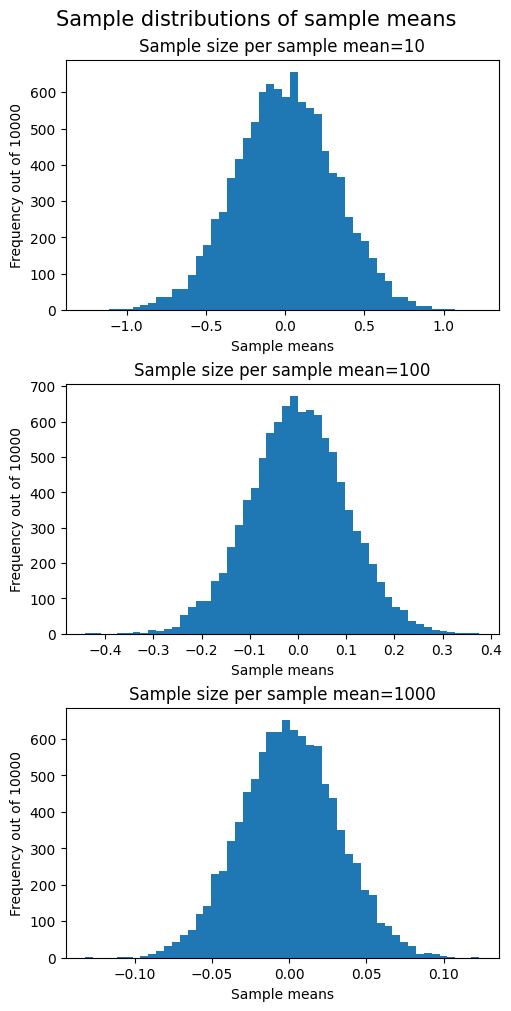

In [13]:
fig, ax = plt.subplots(3, constrained_layout=True, figsize=(5, 10))
fig.suptitle("Sample distributions of sample means", size=15)
for i in range(3):
  ax[i].hist(S[i], bins=50)
  ax[i].set_title(f"Sample size per sample mean={10**(i+1)}")
  ax[i].set_xlabel("Sample means"), ax[i].set_ylabel("Frequency out of 10000")
plt.show()

### Part 2

Creating a class `sample_mean_distribution` to implement the probability distribution of sample means for samples of size $m$ drawn from the probability distribution $N(0,1)$ (i.e. normal distribution with mean $0$ and standard deviation $1$). Note that the probability distribution of sample means maps each possible sample mean value to a probability density and the probability mass evaluated from this distribution for a range gives the probability of obtaining the sample mean (for a sample of size $m$) within that range.

Let $N(\mu, \sigma)$ denote a normal distribution with mean $\mu$ and standard deviation $\sigma$. Now, consider $m$ normal distributions:<br>$N(\mu_1, \sigma_1), N(\mu_2, \sigma_2) ... N(\mu_m, \sigma_m)$<br>The sum of these distributions is:<br>$N(\mu_1 + \mu_2 ... \mu_m, \sqrt{\sigma_1^2 + \sigma_2^2 ... \sigma_m^2}$<br><br>Also, we have that for any constant $\alpha$, $\alpha N(\mu, \sigma)=N(\alpha \mu, \alpha \sigma)$.<br><br>Hence, the sum of $m$ copies of $N(0,1)$ is $N(0, \sqrt{m})$, and the mean of these $m$ copies is $\frac{1}{m}N(0, \sqrt{m})=N(0, \frac{\sqrt{m}}{m})=N(0, \frac{1}{\sqrt{m}})$; this is the distribution we need to implement.

In [14]:
class sample_mean_distribution:
  def __init__(self, m):
    self.sigma = 1/np.sqrt(m)
    # Instantiating the distribution:
    self.dist = norm(loc=0, scale=self.sigma)

  # PDF function:
  def PDF(self, x):
    return self.dist.pdf(x)

Plotting the PDF's of three instances of the above class...

In [15]:
# Instantiating 3 instances of `sample_mean_distribution`:
D = [sample_mean_distribution(10),
     sample_mean_distribution(100),
     sample_mean_distribution(1000)]
# Creating a
xList = np.linspace(-1, 1, 1000)

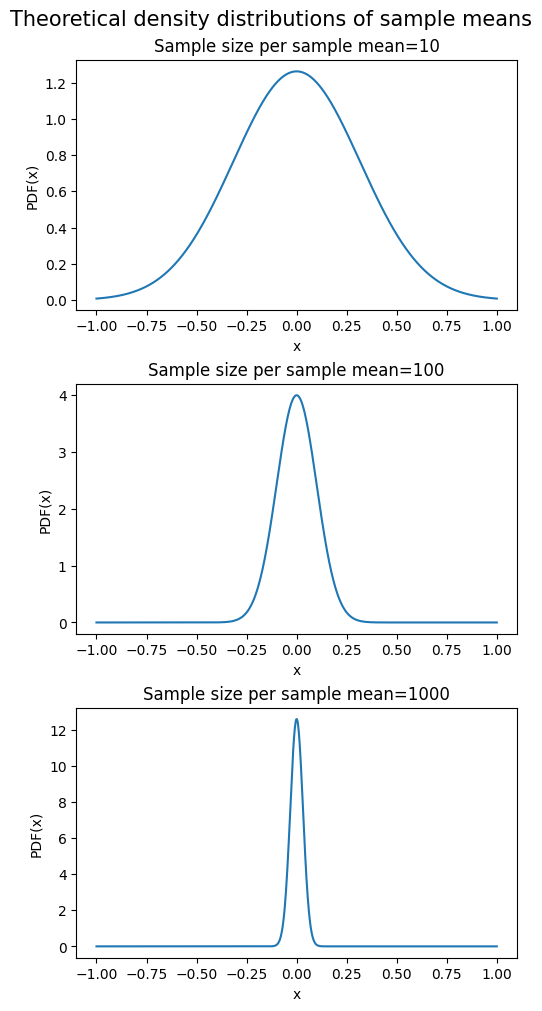

In [16]:
fig, ax = plt.subplots(3, constrained_layout=True, figsize=(5, 10))
fig.suptitle("Theoretical density distributions of sample means", size=15)
for i in range(3):
  ax[i].plot(xList, D[i].PDF(xList))
  ax[i].set_title(f"Sample size per sample mean={10**(i+1)}")
  ax[i].set_xlabel("x"), ax[i].set_ylabel("PDF(x)")
plt.show()

### Part 3

Plotting the histograms of densities of the samples of sample means obtained previously along with above PDF's of the theoretical distributions of the sample means...

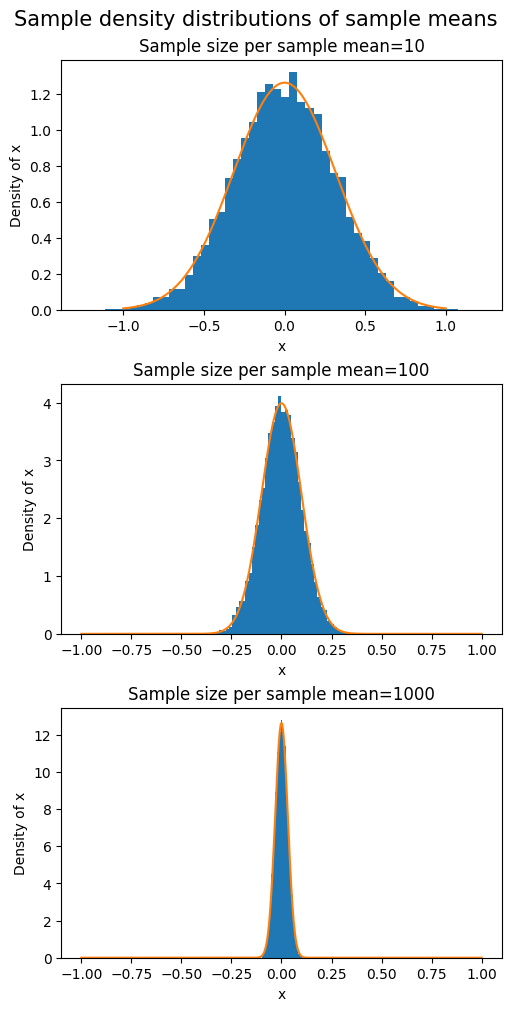

In [17]:
fig, ax = plt.subplots(3, constrained_layout=True, figsize=(5, 10))
fig.suptitle("Sample density distributions of sample means", size=15)
for i in range(3):
  ax[i].hist(S[i], bins=50, density=True)
  ax[i].plot(xList, D[i].PDF(xList))
  ax[i].set_title(f"Sample size per sample mean={10**(i+1)}")
  ax[i].set_xlabel("x"), ax[i].set_ylabel("Density of x")
plt.show()

### Conclusions
We observe that as we took samples of increasing sizes (keeping the number of samples constant at 1000) to calculate the sample mean, the distribution of means became increasingly more peaked and concentrated around $0$ (the true mean value). This reflects the fact that the sample mean is a consistent estimator of the true mean, i.e. the probability of the sample mean falling within an arbitrarily small interval around the true mean tends to $1$ as the sample size (per sample mean calculation) tends to infinity. We observe this fact both in (1) the theoretical distributions evaluated solely based on derivations from the properties of the probability distribution being averaged and (2) the sample distributions evaluated based on the random samples drawn from the probability distribution being averaged.<br><br>From the distribution curves and density-histograms plotted together, we see that their shapes coincide closely, indicating that the sample density distribution converges to the theoretical density distribution as we increase the number of sample means taken.